## **Data overview**

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing
import re #pattern searching in a string

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

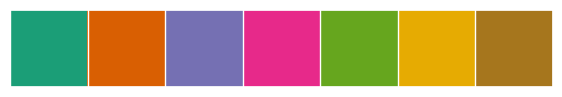

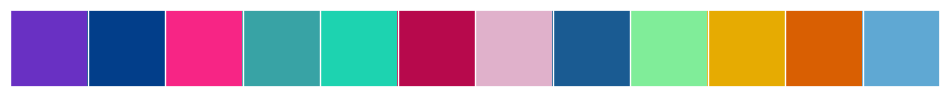

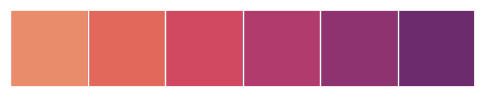

In [9]:
qual_colors1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
qual_colors1 = sns.color_palette(sns.color_palette(qual_colors1))
sns.palplot(qual_colors1)

qual_colors2 = ['#6930c3','#023e8a','#F72585','#38a3a5','#1dd3b0','#b7094c','#e0b1cb','#1a5b92','#80ed99','#e6ab02','#d95f02','#5fa8d3']
qual_colors2 = sns.color_palette(sns.color_palette(qual_colors2))
sns.palplot(qual_colors2)

num_pal = sns.color_palette("flare")
sns.palplot(num_pal)

In [10]:
df18 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2018.csv', parse_dates=['transaction_date'])
df19 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2019.csv', parse_dates=['transaction_date'])
df20 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2020.csv', parse_dates=['transaction_date'])
df21 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2021.csv', parse_dates=['transaction_date'])
df22 = pd.read_csv('C:/Users/PC/Desktop/Prethesis/data_csv/data_2022.csv', parse_dates=['transaction_date'])


In [11]:
total = pd.concat([df18,df19,df20,df21,df22],axis=0)
print(total.shape)
total.sample(5)

(8454383, 12)


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
657933,350029012,489775837,1935.8470,0.0,2019-08-23,MTR ITMTR00417 Brooklyn FF Black 36,MTR ITMTR00417 Brooklyn FF Black 36,Black,36,West,West_7056,2019
527032,467253303,592219612,1804.3657,0.0,2020-12-18,MDE ITMDN00347 Brooklyn 5P Light Wash 42,MDE ITMDN00347 Brooklyn 5P Light Wash 42,Light Wash,42,South,South_7349,2020
1183539,307438251,773412539,2030.2617,0.0,2022-10-23,MTR ITMTR00879 Brooklyn FF Choco 40,MTR ITMTR00879 Brooklyn FF Choco 40,NOT-CAPTURED,NOT-CAPTURED,South,South_7121,2022
2427541,521623675,747775216,1265.4355,0.0,2022-07-30,MSH ITMSH03933 Slim LS Navy Ind M,MSH ITMSH03933 Slim LS Navy Ind M,NOT-CAPTURED,NOT-CAPTURED,East,East_7375,2022
466981,3503381,411207987,899.0000,0.0,2018-09-29,BTS ITBTS00160 Regular SS Orange M,BOYS T-SHIRT,Orange,M,South,South_7001,2018


In [12]:
def find_nan(df):
    columns = df.columns
    col_values = total.isna().sum().values
    temp = pd.DataFrame(data=col_values,index=columns,columns=['missing_count'])
    temp['percent_missing'] = np.round((temp['missing_count'] / total.shape[0]) *100 ,2)
    return temp

find_nan(total)

,missing_count,percent_missing
user_id,0,0.00
bill_id,0,0.00
line_item_amount,0,0.00
bill_discount,0,0.00
transaction_date,0,0.00
description,17,0.00
inventory_category,697444,8.25
colour,15555,0.18
size,15555,0.18
zone_name,0,0.00


In [13]:
# extract weekday and month from transaction date
total['month'] = total['transaction_date'].dt.month_name()
total['weekday'] = total['transaction_date'].dt.day_name()
total.sample(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
555754,431618631,485618054,1878.6329,0.0,2019-08-08,MSH ITMSH01656 Chiseled LS Lt Indigo M,MSH ITMSH01656 Chiseled LS Lt Indigo M,Lt Indigo,M,South,South_7274,2019,August,Thursday
823578,405485894,409348000,5.0000,0.0,2018-09-17,CBG ITCBR00001 NA NA KHAKI 12X4X16,CARRY BAG,Navy,DEFAULT,South,South_7002,2018,September,Monday


In [14]:
total.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,44 / 112CM,East,East_7096,2018,August,Saturday
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,32 / 97CM,North,North_7018,2018,July,Sunday
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,36 / 92CM,North,North_6505,2018,January,Friday
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,32 / 82CM,North,North_6505,2018,January,Wednesday
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,38 / 112CM,East,East_7310,2018,March,Thursday


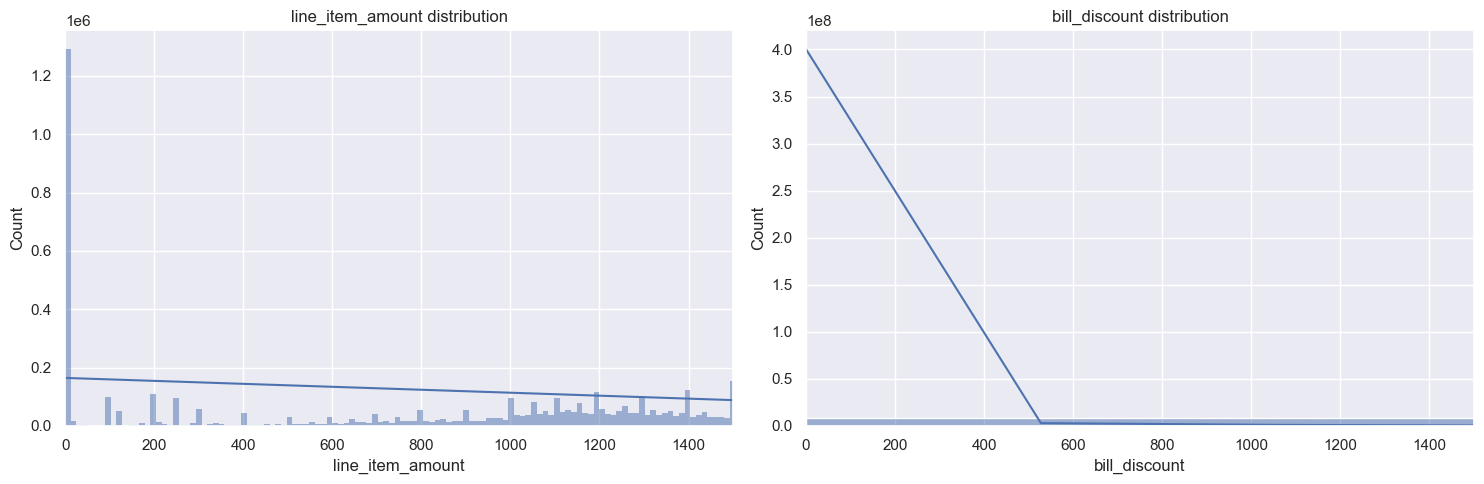

In [15]:
# numerical features distribution
fig , ax = plt.subplots(1,2,figsize=(15,5))
for i,col in enumerate(['line_item_amount','bill_discount']):
    sns.histplot(data=total,x=col,kde=True,ax=ax[i])
    ax[i].set_xlim([0,1500])
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col} distribution')

fig.tight_layout()
plt.show()

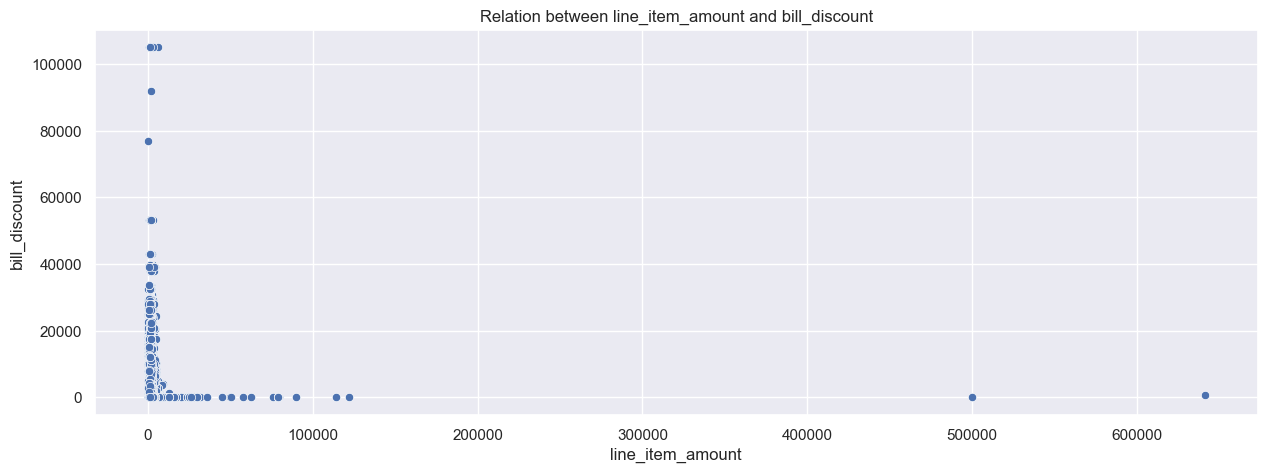

In [16]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=total,x='line_item_amount',y='bill_discount')
plt.title('Relation between line_item_amount and bill_discount')
plt.show()

## **Data Cleaning and FE**

In [17]:
def get_product(txt,pattern):
    if isinstance(txt, str):

        #search and check if split word exists
        searched_word = re.search(pattern, txt)

        #word exists
        if searched_word:
            splitted_string = re.split(pattern, txt)[0]
            # check if empty list is returned->when there is only pattern available in 'txt'
            if splitted_string == '':
                return 'Unknown'
            else:
                return splitted_string.strip()

        #split word not exists(but the product name can still be present , so we'll need the entire string)
        else:
            return txt

    # any other value found other than string datatype
    else:
        return 'Unknown'

total['desc_copy'] = total['description'].copy()
total['desc_copy'] = total['desc_copy'].fillna('Unknown')

#for patterns starting with IT,CORE-, A16-,A17-,S16-,S18-,TBA07SD7890(LENGTH=11)
total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))

#product names are acronyms are their lengths are not greater than 2.
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)

#removing inconsistent data
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\1104822059.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\1104822059.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\1104822059.py:34: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)


In [18]:
# removing more inconsistent data
invalid_vals = ['CALandLine', 'CAMobile', 'Cashier','PendingOrders','DOB', 'DOA', 'LastVisit', 'Points',
'Anniversary', 'CashierMBO','OrderCashier','CreditLimit',
'DateOfAnniversary', 'OtherDetails', 'IsReminderRequired',
'AgreeToReceiveSMS', 'Gender', 'AwarenessSourceRemarks',
'AllowCredit', 'CreditDays', 'AgreeToReceiveCall', 'DateOfBirth','Administrator','MRPValue','CGST', 'BatchDescription',
'TaxDescription', 'IsActive', 'CardExpiryDate','DealerType','DND','DEFAULT']

total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\3687048637.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)


In [19]:
total['ic_copy'] = total['inventory_category'].copy()
total['ic_copy'] = total['ic_copy'].fillna('Unknown')
total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))

total['colour'] = total['colour'].fillna('Unknown')
total['colour'] = total['colour'].str.replace('NOT-CAPTURED','Unknown')

total['size'] = total['size'].fillna('Unknown')
total['size'] = total['size'].str.replace('NOT-CAPTURED','Unknown')

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\1855135140.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))


In [20]:
## IDENTIFYING COLOURS
all_colours = total['colour'].value_counts().index.tolist()
pattern = r'\b(?:' + '|'.join(re.escape(color)  for color in all_colours if isinstance(color,str)) + r')\b'

def find(txt,pattern):
    x = re.findall(pattern, txt,flags=re.IGNORECASE)
    if x==[]:
        return ('Unknown')
    return ' '.join(x)

print('Unique colours count before:',len(total['colour'].unique()))

unknown_colours_bef = total[total['colour']=='Unknown'].shape[0]
total.loc[(total['colour']=='Unknown'),'colour'] = total.loc[(total['colour']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
unknown_colours_after = total[total['colour']=='Unknown'].shape[0]
print('Colours found: ',unknown_colours_bef - unknown_colours_after)

print('Unique colours count after:',len(total['colour'].unique()))

Unique colours count before: 402
Colours found:  2331166
Unique colours count after: 457


In [21]:
# colours with highest sales
highest_sales_colours = total[total['colour']!='Unknown'].groupby(['colour'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_colours[:20]

colour
Light Brown      5099.0000
Deep Grey        4499.2500
Teal+Choco       3999.0000
Fawn             3599.4000
Military         3599.4000
Blk+White        3119.4000
Navy+Choco       3119.4000
Silky            3082.8486
Slvr Grey        2969.0410
Denim            2786.7250
Olive Camo       2699.4000
Black Matt       2699.4000
Navy Camo        2699.4000
Burgandy         2699.0000
Black Mel        2619.2289
Midnight         2617.1702
Vintage Khaki    2599.0000
Sand Stone       2545.2908
Camel            2499.5000
Dk Brown         2499.0000
Name: line_item_amount, dtype: float64

In [22]:
## IDENTIFYING SIZE
all_size = total['size'].unique().tolist()
pattern = r'\b(?:' + '|'.join(re.escape(size) for size in all_size if isinstance(size,str)) + r')\b'

print('Unique size count before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,r'\d*x\d*x\d*|\d*mm|\d*cm|\d*m'))
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique size count after:',len(total['size'].unique()))

Unique size count before: 68
Sizes found:  2559280
Unique size count after: 129


In [23]:
def find_size(txt,pattern):
    try:

        x = re.findall(pattern,txt,flags=re.IGNORECASE)
        if x==[]:
            return ('Unknown')

        x =  ', '.join(x)
        if x != '':
            return (txt.split(x)[1])
    except:
        return 'Unknown'

print('Unique sizes before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find_size(row,r'Size'))
#some rows contains sizes seperated by ( , ) like m,s  which is incorrect as at a time a product can have only 1 size
total[['size']] = total[['size']].applymap(lambda x: x.split(' ')[-1].strip() if ' ' in x else x)
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique sizes after:',len(total['size'].unique()))

Unique sizes before: 129


C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2519896900.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total[['size']] = total[['size']].applymap(lambda x: x.split(' ')[-1].strip() if ' ' in x else x)


Sizes found:  2146
Unique sizes after: 96


In [24]:
# comman sizes
comman_sizes = total[total['size']!='Unknown'].groupby(['size'])['size'].count().sort_values(ascending=False)
comman_sizes[:10]

size
M          1272218
L          1121393
S           812004
XL          616911
DEFAULT     587851
34          490535
32          407635
36          396651
2XL         358773
12x4x16     279502
Name: size, dtype: int64

In [25]:
replace = {'TR':'MENS TROUSER',
'MSP':'MENS SPORTSCOAT',
'BSP':'MENS SPORTSCOAT',
'TWB': 'MENS TROUSER WITH BELT',
'JKT': 'MENS JACKET',
'SH':'MENS SHIRT',
'MSH':'MENS SHIRT',
'MTR':'MENS TROUSER WITH BELT',
'MBL':'MENS BELT',
'BLT':'MENS BELT',
'SR':'MENS SHORTS',
'MTS':'MENS T-SHIRT',
'TS':'MENS T-SHIRT',
'BSH':'BOYS SHIRT',
'SW':'MENS SWEATER',
'BDE':'BOYS DENIM',
'MFW':'MENS FOOTWEAR',
'FW':'MENS FOOTWEAR',
'BDNM':'BOYS DENIM',
'SX':'MENS SOCKS',
'MSO':'MENS SHORTS',
'SO':'MENS SHORTS',
'MDE':'MENS DENIM',
'BTS':'BOYS T-SHIRT',
'BSO':'BOYS SHORTS',
'MDNM':'MENS DENIM',
'BTR':'BOYS TROUSER',
'MSW':'MENS SWEATER',
'SCKS':'MENS SOCKS',
'MSX':'MENS SOCKS',
'BSW':'BOYS SWEATER',
'MJKT':'MENS JACKET',
'MJA':'MENS JACKET',
'BJKT':'BOYS JACKET',
'BJO':'BOYS Jogger',
'MSC':'MENS JACKET',
'BS':'BOYS SHIRT',
'MWL':'Mens Wallet - Sportswear',
'BJA':'BOYS JACKET',
'BSR':'BOYS SHORTS',
'MDN':'MENS Denim Trouser',
'BDN':'Boys Denim Trouser - Jeanswear',
'KT':'MENS KNIT TROUSER',
'MJGR':'MENS JOGGER',
'TBG':'Trolley Bag',
'CBG':'CARRY BAG',
'MTIE':'MALE TIE',
'MJO':'MENS JOGGER',
'MWC':'MENS BANDI'}

total['product'] = total['product'].map(lambda x: replace[x] if x in replace.keys() else x)

## **Product Analysis**

In [26]:
print(total['line_item_amount'].describe())
print('-'*30)
print(total['bill_discount'].describe())

count    8.454383e+06
mean     1.334790e+03
std      9.843195e+02
min      0.000000e+00
25%      6.990000e+02
50%      1.352693e+03
75%      1.999000e+03
max      6.410010e+05
Name: line_item_amount, dtype: float64
------------------------------
count    8.454383e+06
mean     9.284983e+01
std      8.119705e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.049536e+05
Name: bill_discount, dtype: float64


In [27]:
## products with highest sales
highest_sales_products = total.groupby(['product'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_products[:10]

product
soap                      50000.0000
MENS SPORTSCOAT            4810.7656
MENS BANDI                 3373.9610
MENS JACKET                3060.1145
MENS Denim Trouser         2499.0000
MENS FOOTWEAR              1999.6000
MENS DENIM                 1999.0000
MENS TROUSER WITH BELT     1954.5580
MENS SHIRT                 1819.3000
MENS SWEATER               1679.4000
Name: line_item_amount, dtype: float64

In [28]:
# most discounted products
highest_discounted_products = total[total['product']!='Unknown'].groupby(['product'])['bill_discount'].median().sort_values(ascending=False)
highest_discounted_products[:5]

product
SHirts          151.85
B                 0.00
MENS SWEATER      0.00
MENS BANDI        0.00
MENS BELT         0.00
Name: bill_discount, dtype: float64

In [29]:
# comman(or most buyed) products
comman_products = total[total['product']!='Unknown'].groupby(['product'])['product'].count().sort_values(ascending=False)
comman_products[:5]

product
MENS SHIRT                2706356
MENS TROUSER WITH BELT    1175228
CARRY BAG                  808099
MENS T-SHIRT               521117
MENS DENIM                 470342
Name: product, dtype: int64

In [30]:
# sales of products with colour
products_with_colour = total[(total['product']!='Unknown')&(total['colour']!='Unknown')].groupby(['product','colour'])['line_item_amount'].median().reset_index().sort_values('line_item_amount',ascending=False)
products_with_colour[:10]

,product,colour,line_item_amount
1100,MENS SPORTSCOAT,Beige,6299.10000
1112,MENS SPORTSCOAT,Lt Grey,6249.00000
1109,MENS SPORTSCOAT,Khaki,5978.52250
741,MENS JACKET,Ink Blue,5858.02880
1117,MENS SPORTSCOAT,Sky,5749.00000
1118,MENS SPORTSCOAT,Wine,5749.00000
1108,MENS SPORTSCOAT,Indigo,5749.00000
745,MENS JACKET,Lt Khaki,5637.78100
1113,MENS SPORTSCOAT,Maroon,5365.10665
1111,MENS SPORTSCOAT,Lt Brown,5264.77830


In [31]:
# highest sales of products with size
products_with_size = total[(total['product']!='Unknown')&(total['size']!='Unknown')].groupby(['product','size'])['line_item_amount'].median().sort_values(ascending=False)
products_with_size[:10]

product          size
MENS SPORTSCOAT  2XL     4983.27150
                 S       4873.83600
                 M       4806.75100
                 L       4798.96000
                 XL      4798.88000
                 3XL     4388.46420
MENS BANDI       S       3446.53660
                 M       3427.55100
                 2XL     3372.90575
                 XL      3353.79170
Name: line_item_amount, dtype: float64

## **Time Analysis**

In [32]:
# What is the total revenue for every year?
total_sales_every_year = total.groupby(['year'])['line_item_amount'].sum()
total_sales_every_year

year
2018    1.900333e+09
2019    2.103860e+09
2020    1.579160e+09
2021    2.302388e+09
2022    3.399087e+09
Name: line_item_amount, dtype: float64

In [33]:
def lineplot(data,x,y,hue,hue_order,title=None,xlabel=None):
    plot = sns.lineplot(data=data,x=x,y=y,markers=True, dashes=True,hue=hue,hue_order=hue_order,style=hue,palette=qual_colors2)
    plt.xlabel(xlabel)
    plt.ylabel(f'{y}')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plot

def barplot(x,y,data=None,ax=None,order=None,palette=qual_colors2,labelrotation=0,title=None):
    plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
    ax.bar_label(plot1.containers[0])
    ax.set_xlabel('')
    ax.set_ylabel(f'{y}')
    ax.set_title(title)
    ax.tick_params(labelrotation=labelrotation)
    return plot1

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\658967557.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


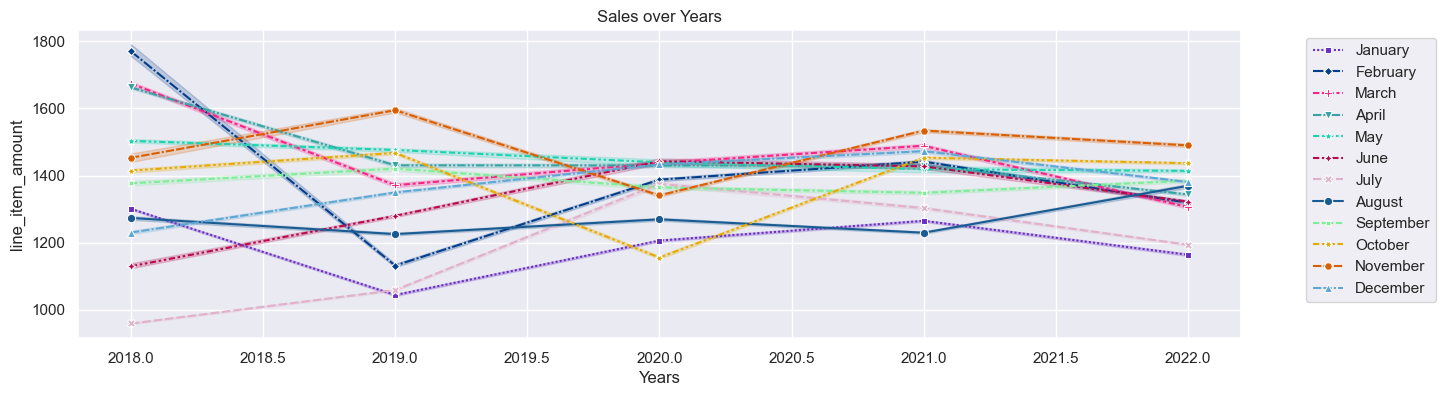

In [34]:
# What are the sales trends over different years or months?
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig = plt.figure(figsize=(15,4))
lineplot(data=total,x="year",y='line_item_amount',hue='month',hue_order=month_order,title='Sales over Years',xlabel='Years')
# fig.supxlabel('Years')
fig.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)


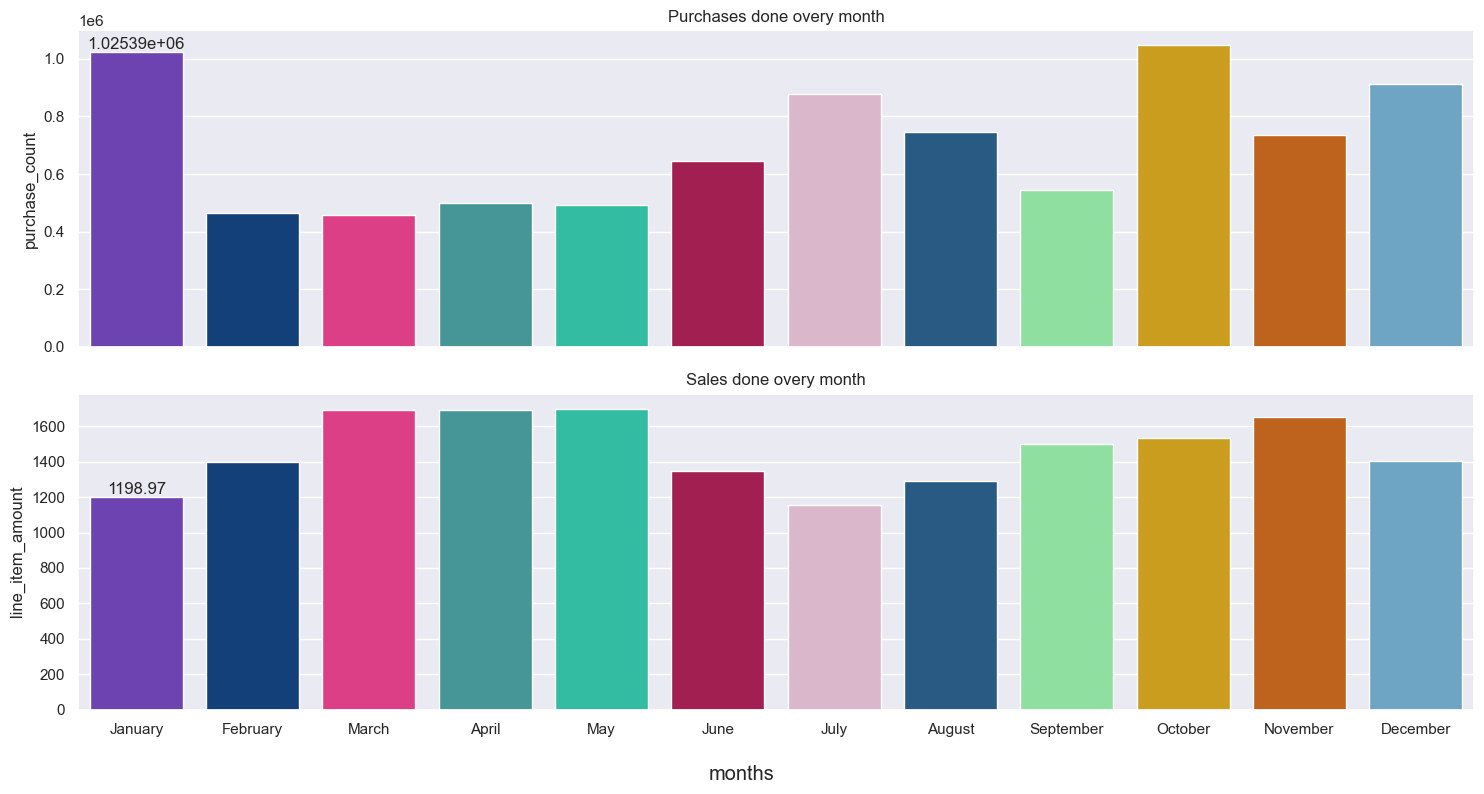

In [35]:
# number of purcheses made each month
purchases_on_each_month = pd.DataFrame(total.groupby(['month'])['month'].count()).rename(columns={'month':'purchase_count'}).reset_index()

# average sales on each month
sales_on_months = total.groupby(['month'])['line_item_amount'].median().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_each_month,x='month',y='purchase_count',ax=ax1,order=month_order,title='Purchases done overy month')

barplot(data=sales_on_months,x='month',y='line_item_amount',ax=ax2,order=month_order,title='Sales done overy month')
fig.supxlabel('months')

fig.tight_layout()

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)


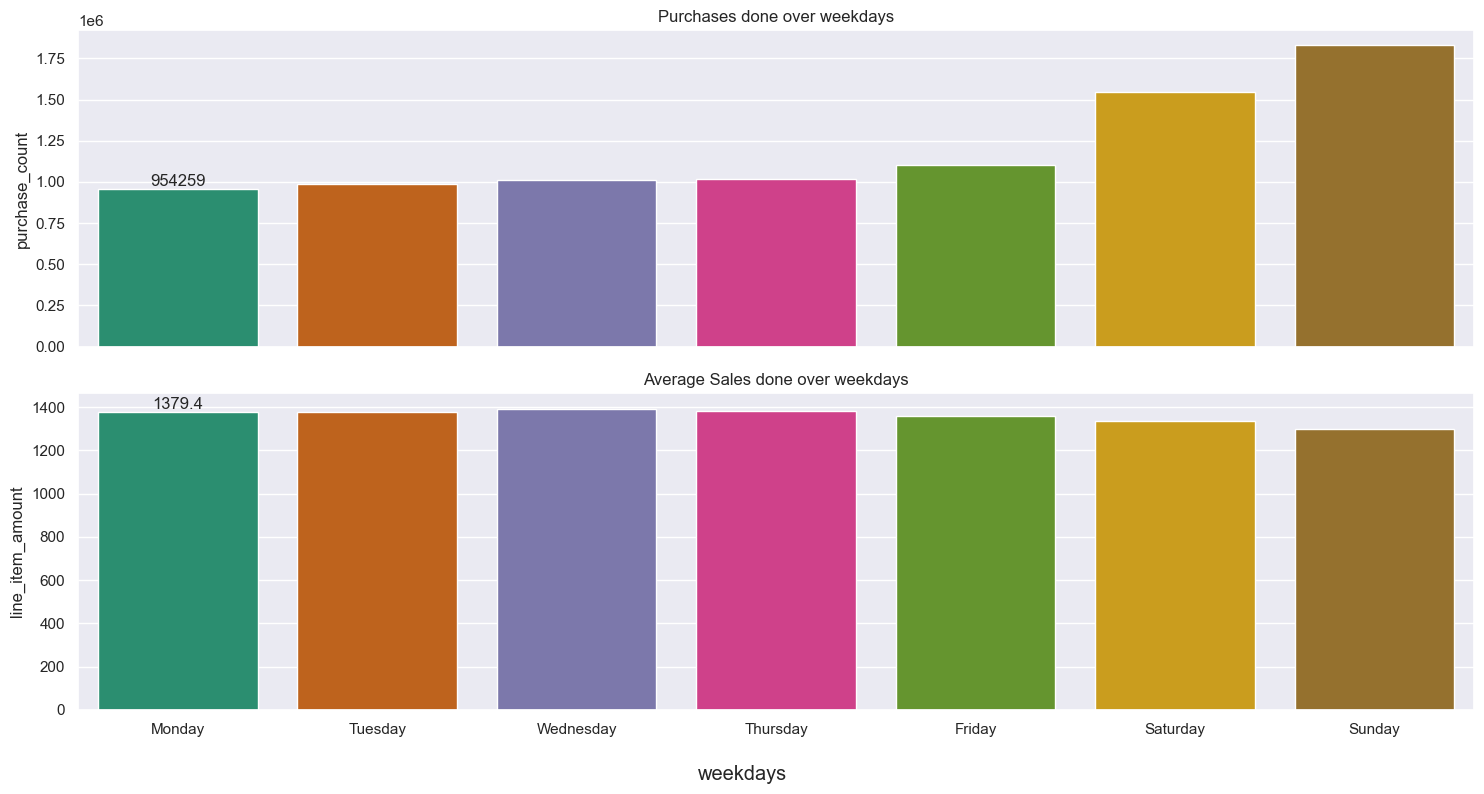

In [36]:
# What are the busiest shopping times of the day or week?
purchases_on_weekdays = pd.DataFrame(total.groupby(['weekday'])['weekday'].count()).rename(columns={'weekday':'purchase_count'}).reset_index()

# average sales on each weekday
sales_on_weekdays = total.groupby(['weekday'])['line_item_amount'].median().reset_index()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_weekdays,x='weekday',y='purchase_count',ax=ax1,order=week_order,palette=qual_colors1,title='Purchases done over weekdays')

barplot(data=sales_on_weekdays,x='weekday',y='line_item_amount',ax=ax2,order=week_order,palette=qual_colors1,title='Average Sales done over weekdays')
fig.supxlabel('weekdays')

fig.tight_layout()

In [37]:
# Which products are most buyed on each year
yearly_most_buyed = total[(total['product']!='Unknown')].groupby(['year','product'])['product'].count().sort_values(ascending=False)
yearly_most_buyed[:10]

year  product               
2022  MENS SHIRT                846856
2019  MENS SHIRT                588494
2021  MENS SHIRT                551088
2020  MENS SHIRT                420666
2022  MENS TROUSER WITH BELT    362136
2018  MENS SHIRT                299252
2022  CTRIMS                    275206
2019  MENS TROUSER WITH BELT    270771
2021  MENS TROUSER WITH BELT    236944
2019  CARRY BAG                 234958
Name: product, dtype: int64

In [38]:
# Which products are most buyed on each month and weekday
monthly_most_buyed = total[(total['product']!='Unknown')].groupby(['month','weekday','product'])['product'].count().sort_values(ascending=False)
monthly_most_buyed[:10]

month     weekday   product   
January   Sunday    MENS SHIRT    80751
October   Sunday    MENS SHIRT    73653
January   Saturday  MENS SHIRT    69099
October   Saturday  MENS SHIRT    65622
July      Sunday    MENS SHIRT    64139
August    Sunday    MENS SHIRT    58776
December  Sunday    MENS SHIRT    58139
July      Saturday  MENS SHIRT    54972
December  Saturday  MENS SHIRT    54725
August    Saturday  MENS SHIRT    51285
Name: product, dtype: int64

## **Store Performance**

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: UserWarning: The palette list has more values (7) than need

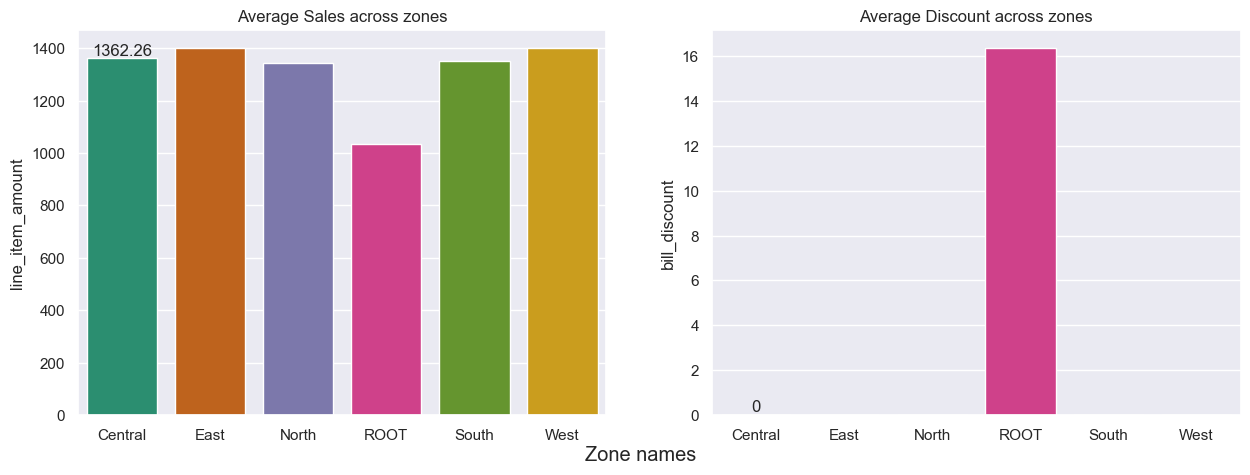

In [39]:
#  How does store performance vary by zone?
zones_sales_mean = total.groupby(['zone_name'])['line_item_amount'].median().reset_index()
zones_discount_mean = total.groupby(['zone_name'])['bill_discount'].median().reset_index()

fig,(ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

barplot(data = zones_sales_mean , x='zone_name',y='line_item_amount',ax=ax1,palette=qual_colors1,title='Average Sales across zones')

barplot(data = zones_discount_mean ,x='zone_name',y='bill_discount',ax=ax2,palette=qual_colors1,title='Average Discount across zones')

fig.supxlabel('Zone names')
fig.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: UserWarning: The palette list has more values (12) than needed (1), which may not be intended.
  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\2837151514.py:10: UserWarning: 
The palette list has fewer values (12) than 

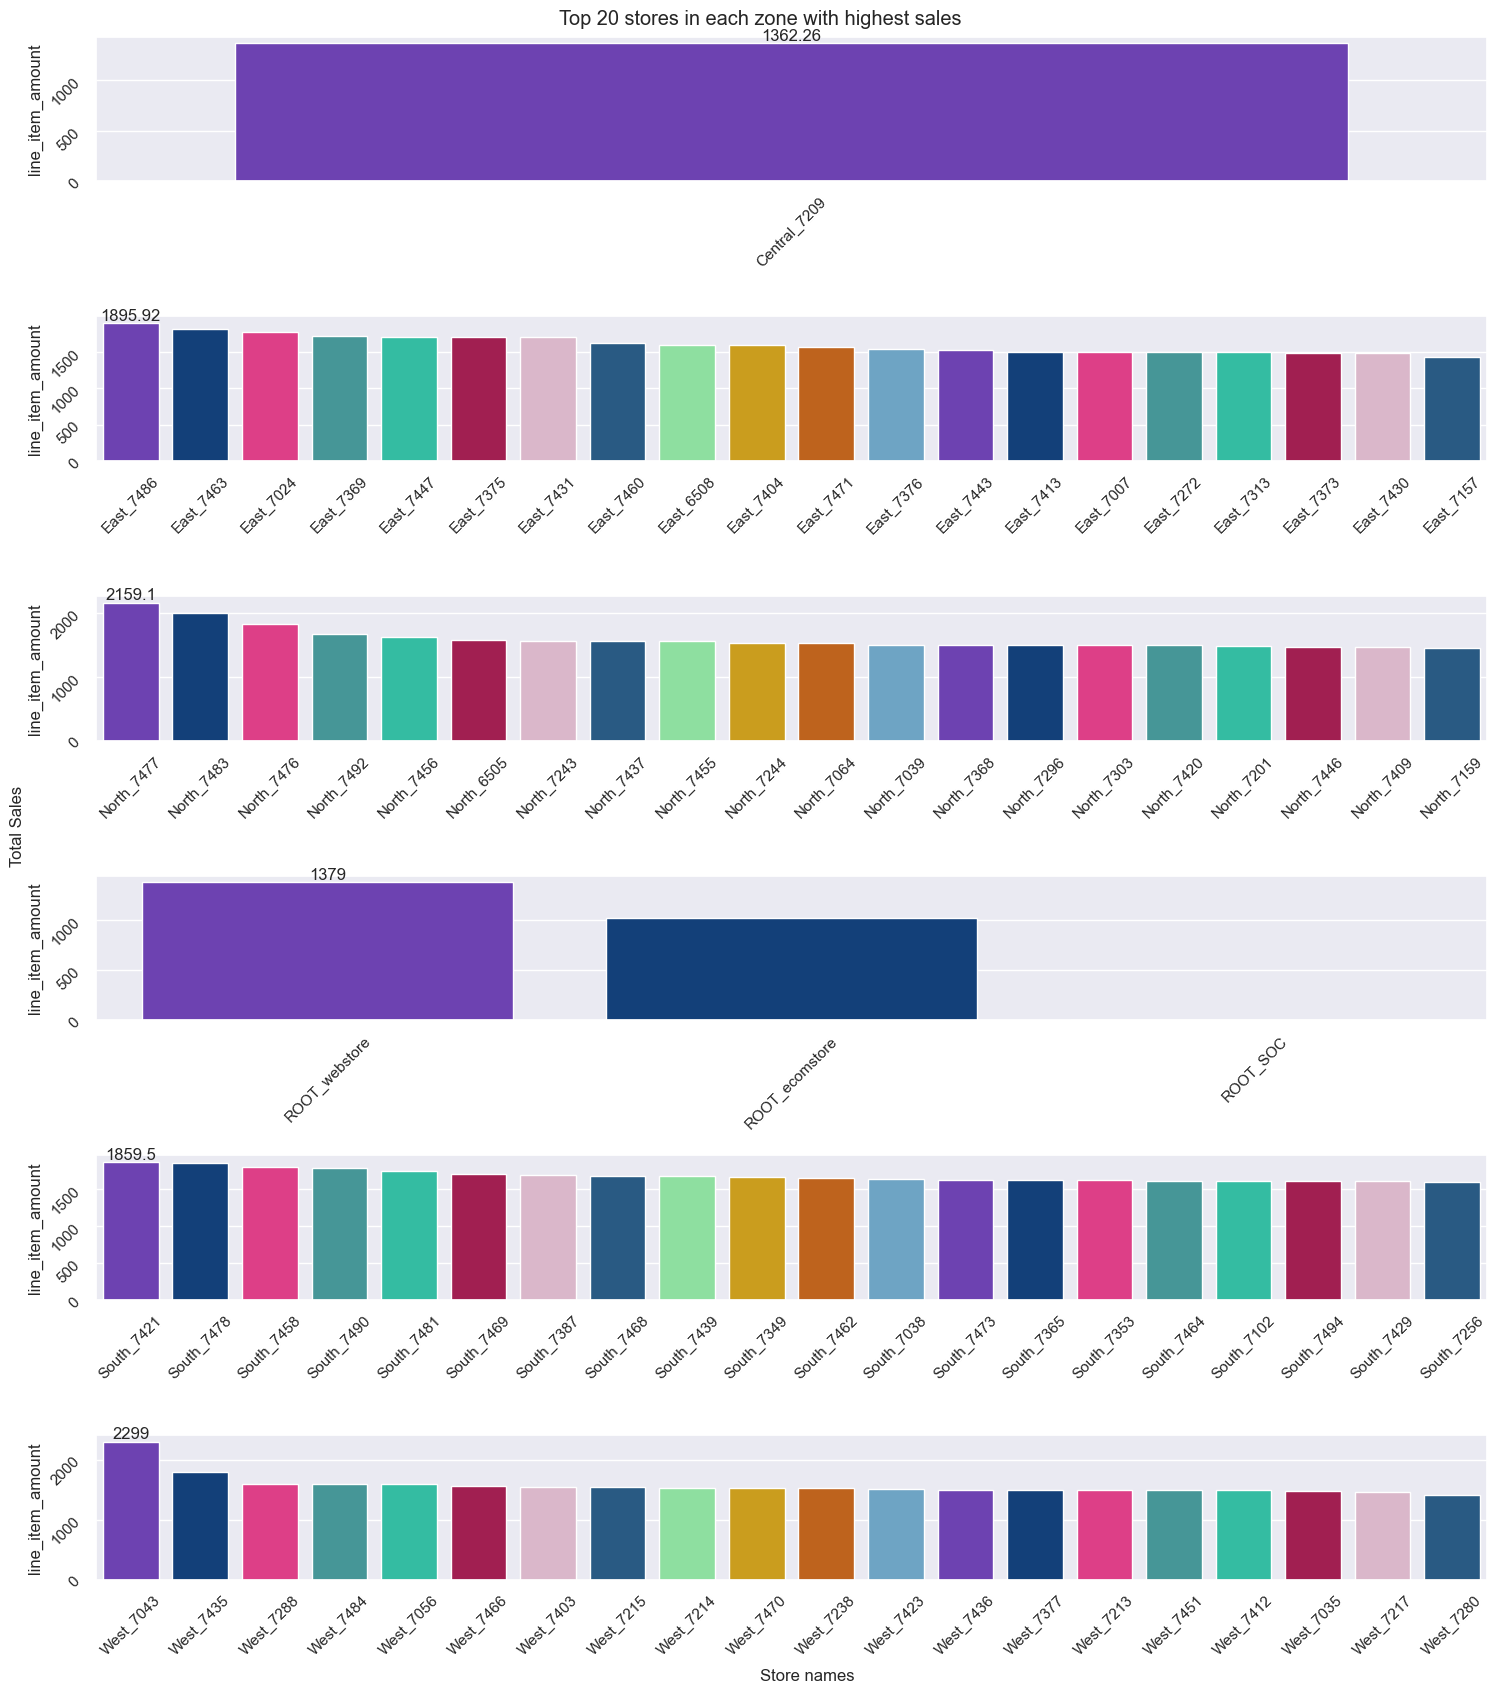

In [40]:
# stores from each zones with highest sales
zone_and_store_sales = total.groupby(['zone_name','store_name'])['line_item_amount'].median().reset_index()

# sales in different zones stores
zones = zone_and_store_sales.zone_name.unique().tolist()

fig , ax = plt.subplots(6,figsize=(15,17))

for i,zone in enumerate(zones):
    stores_with_highest_sales = zone_and_store_sales[zone_and_store_sales['zone_name']==zone].sort_values('line_item_amount',ascending=False)[:20]

    bar = barplot(data = stores_with_highest_sales , x='store_name',y='line_item_amount',ax=ax[i],labelrotation=45,title='')

fig.suptitle('Top 20 stores in each zone with highest sales')
fig.tight_layout()

fig.text(0.00, 0.5, 'Total Sales', va='center', rotation='vertical')
fig.text(0.5, 0, 'Store names', va='center')

fig.show()

## **Data Cleaning**


In [41]:
df_null = round(100*(total.isnull().sum())/len(total), 2)
df_null

user_id               0.00
bill_id               0.00
line_item_amount      0.00
bill_discount         0.00
transaction_date      0.00
description           0.00
inventory_category    8.25
colour                0.00
size                  0.00
zone_name             0.00
store_name            0.00
year                  0.00
month                 0.00
weekday               0.00
desc_copy             0.00
product               0.00
ic_copy               0.00
dtype: float64

We are going to analysis the Customers based on below 3 factors:¶

R (Recency): Number of days since last purchase
F (Frequency): Number of tracsactions
M (Monetary): Total amount of transactions (revenue contributed)

In [42]:
# Calculate monetary value for each transaction
total['transaction_value'] = total['line_item_amount'] * (1 - total['bill_discount'])

# Aggregate monetary value by customer
rfm_m = total.groupby('user_id')['transaction_value'].sum().reset_index()
rfm_m.columns = ['user_id', 'monetary_value']  # Rename the column

rfm_m.head()

,user_id,monetary_value
0,50049,8.805000e+03
1,50174,-1.777935e+06
2,50511,1.624600e+04
3,50565,-2.602575e+06
4,53762,5.398000e+03


In [43]:
# Calculate frequency
rfm_f = total.groupby('user_id')['bill_id'].count().reset_index()
rfm_f.columns = ['user_id', 'frequency']  # Rename the column

rfm_f.head() 


,user_id,frequency
0,50049,10
1,50174,39
2,50511,11
3,50565,21
4,53762,3


In [44]:
# Merge RFM dataframes 
rfm = pd.merge(rfm_m, rfm_f, on='user_id', how='inner')
print(rfm.head().to_markdown(index=False, numalign="left", stralign="left"))


| user_id   | monetary_value   | frequency   |
|:----------|:-----------------|:------------|
| 50049     | 8805             | 10          |
| 50174     | -1.77794e+06     | 39          |
| 50511     | 16246            | 11          |
| 50565     | -2.60257e+06     | 21          |
| 53762     | 5398             | 3           |


In [45]:
# Ensure transaction_date is in datetime format
total['transaction_date'] = pd.to_datetime(total['transaction_date']) 

# Get the maximum transaction date (most recent)
reference_date = total['transaction_date'].max()

# Calculate recency
rfm_r = total.groupby('user_id')['transaction_date'].max().reset_index()
rfm_r.columns = ['user_id', 'last_purchase_date']
rfm_r['recency'] = (reference_date - rfm_r['last_purchase_date']).dt.days
rfm_r = rfm_r[['user_id', 'recency']]  # Keep only relevant columns

rfm_r.head()


,user_id,recency
0,50049,204
1,50174,385
2,50511,299
3,50565,137
4,53762,700


In [46]:
# Compute the maximum transaction date
max_date = total['transaction_date'].max()

# Compute the difference between max date and transaction date
total['diff'] = max_date - total['transaction_date']

# Compute the last transaction date to get the recency of customers
rfm_r = total.groupby('user_id')['diff'].min()
rfm_r = rfm_r.reset_index()

# Extract number of days only
rfm_r['recency'] = rfm_r['diff'].dt.days
rfm_r = rfm_r[['user_id', 'recency']]  # Keep only relevant columns

rfm_r.head()

,user_id,recency
0,50049,204
1,50174,385
2,50511,299
3,50565,137
4,53762,700


In [47]:
# Merge the dataframes to get the final RFM dataframe
rfm = pd.merge(rfm, rfm_r, on='user_id', how='inner')
rfm.columns = ['user_id', 'monetary_value', 'frequency', 'recency']

print(rfm.head().to_markdown(index=False, numalign="left", stralign="left"))


| user_id   | monetary_value   | frequency   | recency   |
|:----------|:-----------------|:------------|:----------|
| 50049     | 8805             | 10          | 204       |
| 50174     | -1.77794e+06     | 39          | 385       |
| 50511     | 16246            | 11          | 299       |
| 50565     | -2.60257e+06     | 21          | 137       |
| 53762     | 5398             | 3           | 700       |


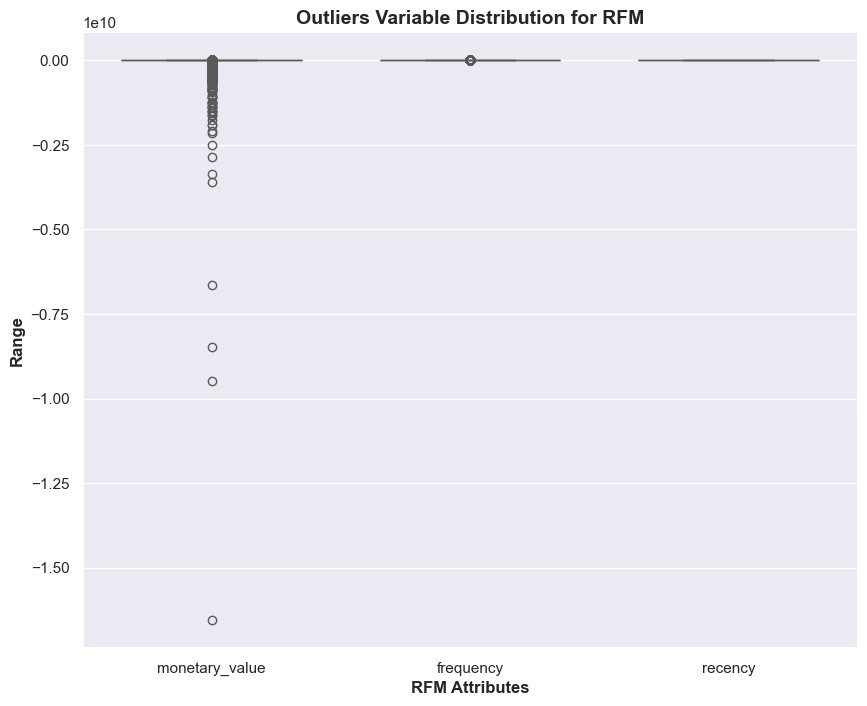

In [48]:
# Outlier Analysis of RFM Features

import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the figure size for better visualization
plt.rcParams['figure.figsize'] = [10,8]

# Create a boxplot to visualize outliers for RFM
sns.boxplot(data = rfm[['monetary_value','frequency','recency']], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)

# Setting the title of the boxplot
plt.title("Outliers Variable Distribution for RFM", fontsize = 14, fontweight = 'bold')

# Setting the y-axis label
plt.ylabel("Range", fontweight = 'bold')

# Setting the x-axis label
plt.xlabel("RFM Attributes", fontweight = 'bold')
plt.show()


In [49]:
# Remove Statistical Outliers for RFM Features

# Monetary Value Outliers
Q1 = rfm['monetary_value'].quantile(0.05)
Q3 = rfm['monetary_value'].quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm['monetary_value'] >= Q1 - 1.5*IQR) & (rfm['monetary_value'] <= Q3 + 1.5*IQR)]

# Recency Outliers
Q1 = rfm['recency'].quantile(0.05)
Q3 = rfm['recency'].quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm['recency'] >= Q1 - 1.5*IQR) & (rfm['recency'] <= Q3 + 1.5*IQR)]

# Frequency Outliers
Q1 = rfm['frequency'].quantile(0.05)
Q3 = rfm['frequency'].quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm['frequency'] >= Q1 - 1.5*IQR) & (rfm['frequency'] <= Q3 + 1.5*IQR)]

print("The number of customers after outliers removal:", rfm.shape[0])


The number of customers after outliers removal: 929731


In [50]:
# Rescaling the Attributes

from sklearn.preprocessing import StandardScaler

# Select the RFM attributes to scale
rfm_df_scaled = rfm[['monetary_value', 'frequency', 'recency']]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the RFM data
rfm_df_scaled = scaler.fit_transform(rfm_df_scaled)

# Check the shape of the scaled DataFrame
rfm_df_scaled.shape


(929731, 3)

In [51]:
# Assign column names to the scaled RFM DataFrame
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['monetary_value', 'frequency', 'recency'])

# Display the first 5 rows
print(rfm_df_scaled.head().to_markdown(index=False, numalign="left", stralign="left"))


| monetary_value   | frequency   | recency   |
|:-----------------|:------------|:----------|
| 0.219673         | 0.470379    | -0.989316 |
| -2.77703         | 4.10249     | -0.672048 |
| 0.232153         | 0.595625    | -0.822794 |
| -4.1601          | 1.84808     | -1.10676  |
| 0.213958         | -0.406338   | -0.119895 |


### **Step 4 : Building the Model**


In [52]:
from sklearn.cluster import KMeans

# Apply K-means clustering with k = 4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42, verbose=1)
rfm['cluster'] = kmeans.fit_predict(rfm_df_scaled)


Initialization complete
Iteration 0, inertia 998641.4633301909.
Iteration 1, inertia 785020.7334010333.
Iteration 2, inertia 753788.8752909692.
Iteration 3, inertia 748207.9868072307.
Iteration 4, inertia 746787.7566059084.
Iteration 5, inertia 746056.0012642909.
Iteration 6, inertia 745972.9379296736.
Iteration 7, inertia 745960.5914664244.
Converged at iteration 7: center shift 4.1656271430106516e-05 within tolerance 9.999999999992831e-05.


In [53]:
kmeans.labels_

array([1, 2, 1, ..., 1, 3, 1])

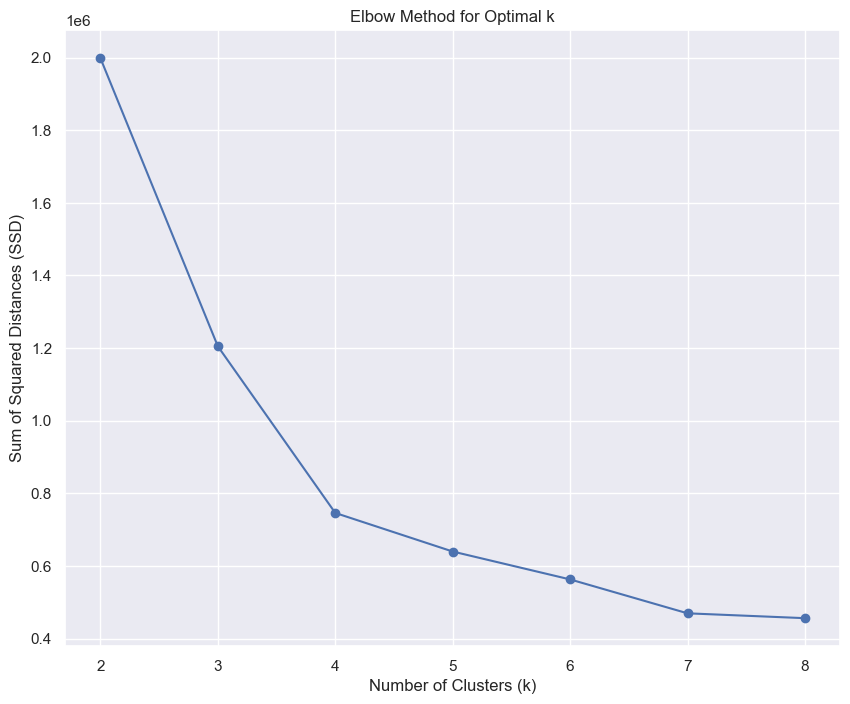

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)  
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.xticks(range_n_clusters)
plt.show()


## **Apriori apply test**

In [66]:
from mlxtend.frequent_patterns import association_rules, apriori

In [67]:
# Create a copy of 'total' and drop rows with missing values
retail = total.dropna()

# Display the shape of the new 'retail' DataFrame
print(retail.shape)


(7756929, 19)


In [68]:
# Cleaning the description column
retail['product'] = retail['product'].astype(str).str.strip().str.lower()


C:\Users\PC\AppData\Local\Temp\ipykernel_6508\3387494942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['product'] = retail['product'].astype(str).str.strip().str.lower()


C:\Users\PC\AppData\Local\Temp\ipykernel_6508\4005234463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = retail['product'].value_counts().head(20).index,


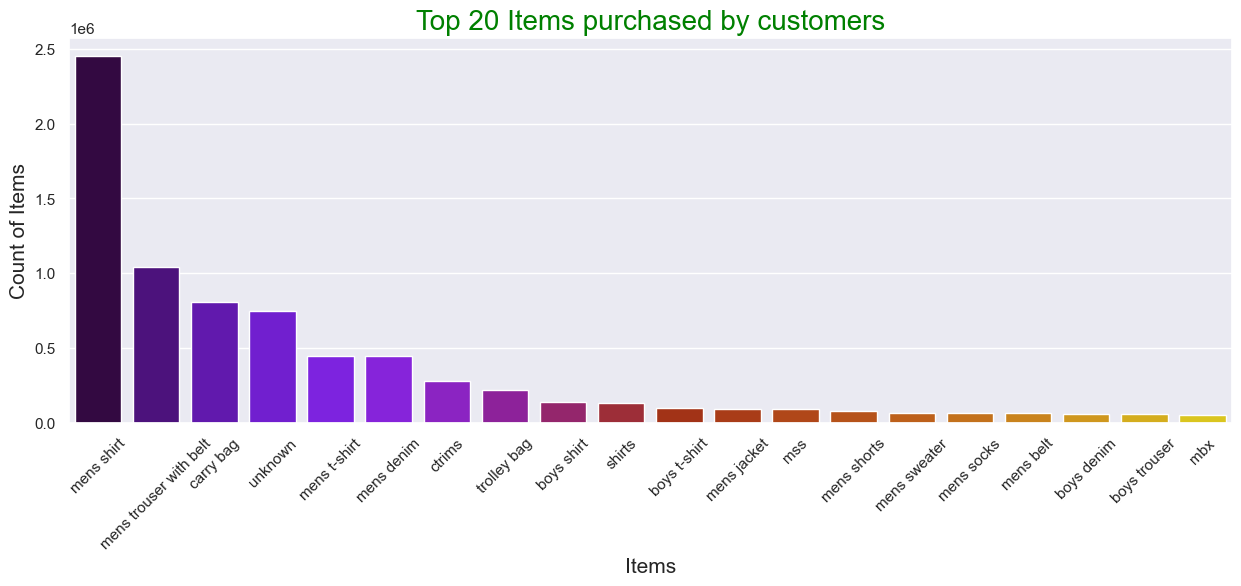

In [69]:
plt.figure(figsize=(15,5))
sns.barplot(x = retail['product'].value_counts().head(20).index, 
            y = retail['product'].value_counts().head(20).values, 
            palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()


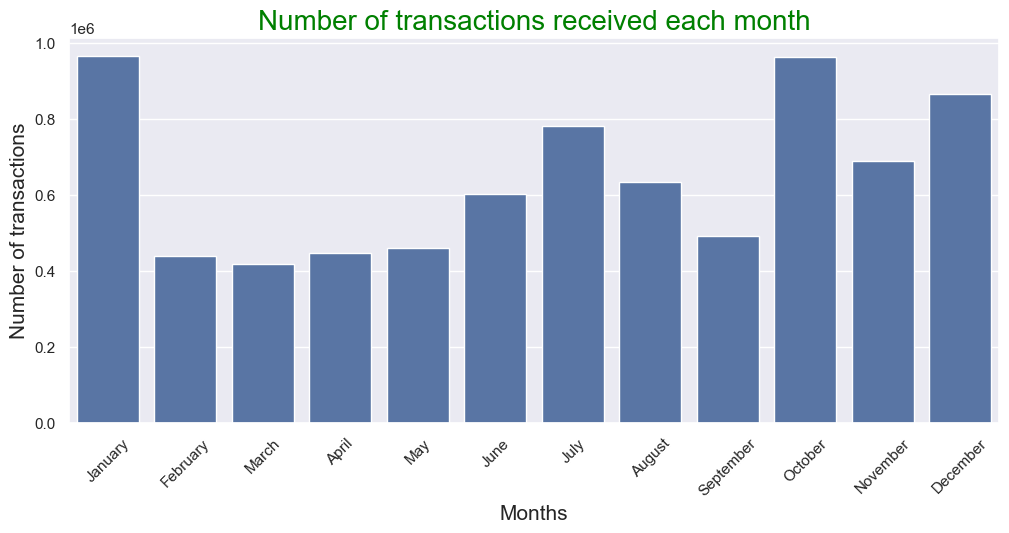

In [70]:
# Count transactions per month
month_tran = retail.groupby('month')['bill_id'].count().reset_index()

# Map months to their order for sorting
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
month_tran['month_order'] = month_tran['month'].map(month_order)

# Sort by month order
month_tran.sort_values("month_order", inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=month_tran, x="month", y="bill_id")
plt.xlabel('Months', size=15)
plt.ylabel('Number of transactions', size=15)
plt.title('Number of transactions received each month', color='green', size=20)
plt.xticks(rotation=45) 
plt.show()


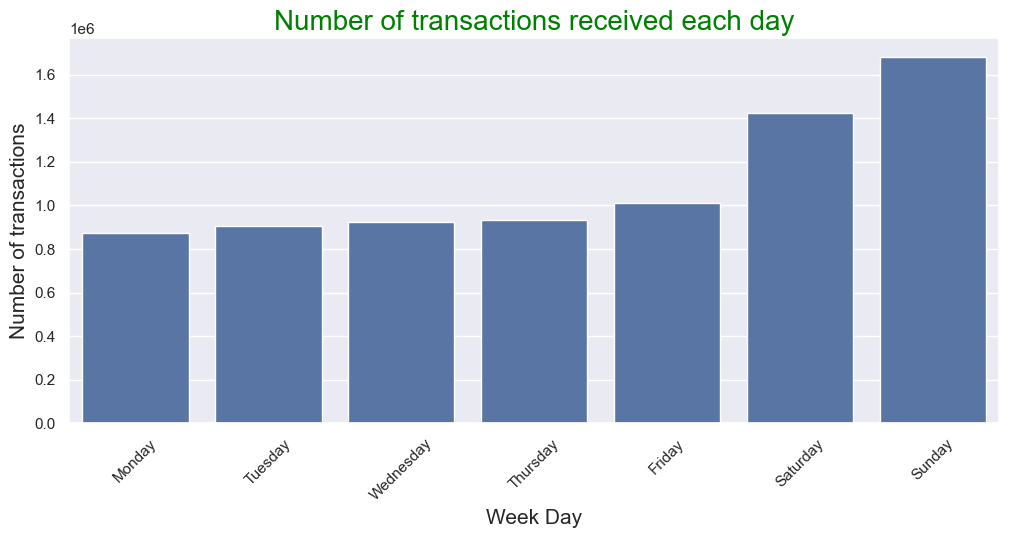

In [71]:
# Count transactions per weekday
week_tran = retail.groupby('weekday')['bill_id'].count().reset_index()

# Manually define the order of weekdays for sorting
weekday_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
week_tran['weekday_order'] = week_tran['weekday'].map(weekday_order)

# Sort by weekday order
week_tran.sort_values("weekday_order", inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=week_tran, x="weekday", y="bill_id")
plt.xlabel('Week Day', size=15)
plt.ylabel('Number of transactions', size=15)
plt.title('Number of transactions received each day', color='green', size=20)
plt.xticks(rotation=45)
plt.show()


In [72]:
# Count item occurrences within each transaction
transactions_str = (
    retail.groupby(['bill_id', 'product'])['product']
    .count()
    .reset_index(name='count')
)

print(transactions_str.head().to_markdown(index=False, numalign="left", stralign="left"))


| bill_id   | product    | count   |
|:----------|:-----------|:--------|
| 360301332 | unknown    | 2       |
| 360302425 | unknown    | 2       |
| 360304072 | unknown    | 1       |
| 360304673 | mens denim | 1       |
| 360304720 | denim      | 1       |


In [73]:
# Create a transaction-item matrix (pivot table)
basket_matrix = (
    transactions_str.pivot_table(index='bill_id', columns='product', values='count', aggfunc='sum')
    .fillna(0)
)

# Binarize the matrix (0 or 1)
basket_matrix = (basket_matrix > 0).astype(int)

# Display the first 5 rows of the basket matrix
print(basket_matrix.head().to_markdown(index=False, numalign="left", stralign="left"))


| b   | bbg   | bcp   | bmk   | boys denim   | boys denim trouser - jeanswear   | boys jacket   | boys jogger   | boys shirt   | boys shorts   | boys sweater   | boys t-shirt   | boys trouser   | bss   | btie   | bwc   | carry bag   | cothers   | ctrims   | denim   | duffelbag   | ffb   | fft   | hhp   | lbg   | male tie   | mb   | mbx   | mens bandi   | mens belt   | mens denim   | mens denim trouser   | mens footwear   | mens jacket   | mens jogger   | mens knit trouser   | mens shirt   | mens shorts   | mens socks   | mens sportscoat   | mens sweater   | mens t-shirt   | mens trouser   | mens trouser with belt   | mens wallet - sportswear   | mmk   | mrg   | ms   | mss   | shirts   | soap   | trolley bag   | unknown   | wlt   | wothers   |
|:----|:------|:------|:------|:-------------|:---------------------------------|:--------------|:--------------|:-------------|:--------------|:---------------|:---------------|:---------------|:------|:-------|:------|:------------|:----------|:

In [74]:
# Create a transaction-item matrix (pivot table)
basket_matrix = (
    retail.groupby(['bill_id', 'product'])['product'].count()
    .unstack(fill_value=0)  
    .reset_index()
    .rename_axis(None, axis=1) 
)

# Binarize the matrix (0 or 1)
basket_matrix.iloc[:, 1:] = (basket_matrix.iloc[:, 1:] > 0).astype(int)

print(basket_matrix.head().to_markdown(index=False, numalign="left", stralign="left"))


| bill_id     | b   | bbg   | bcp   | bmk   | boys denim   | boys denim trouser - jeanswear   | boys jacket   | boys jogger   | boys shirt   | boys shorts   | boys sweater   | boys t-shirt   | boys trouser   | bss   | btie   | bwc   | carry bag   | cothers   | ctrims   | denim   | duffelbag   | ffb   | fft   | hhp   | lbg   | male tie   | mb   | mbx   | mens bandi   | mens belt   | mens denim   | mens denim trouser   | mens footwear   | mens jacket   | mens jogger   | mens knit trouser   | mens shirt   | mens shorts   | mens socks   | mens sportscoat   | mens sweater   | mens t-shirt   | mens trouser   | mens trouser with belt   | mens wallet - sportswear   | mmk   | mrg   | ms   | mss   | shirts   | soap   | trolley bag   | unknown   | wlt   | wothers   |
|:------------|:----|:------|:------|:------|:-------------|:---------------------------------|:--------------|:--------------|:-------------|:--------------|:---------------|:---------------|:---------------|:------|:-------|:------

In [75]:
# Apply Apriori algorithm (use the basket_matrix directly)
frequent_itemsets = apriori(basket_matrix.set_index('bill_id'), min_support=0.01, use_colnames=True)
frequent_itemsets


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.016696,(boys denim)
1,0.035111,(boys shirt)
2,0.021709,(boys t-shirt)
3,0.016331,(boys trouser)
4,0.342581,(carry bag)
...,...,...
65,0.027408,"(mens trouser with belt, mens denim, mens shirt)"
66,0.014972,"(trolley bag, mens denim, mens shirt)"
67,0.017818,"(mens trouser with belt, mens t-shirt, mens sh..."
68,0.029492,"(mens trouser with belt, trolley bag, mens shirt)"


In [76]:


# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by confidence (descending)
rules.sort_values('confidence', ascending=False, inplace=True)

# Display the rules
print(rules.head(10).to_markdown(index=False, numalign="left", stralign="left"))


| antecedents                                                      | consequents               | antecedent support   | consequent support   | support   | confidence   | lift    | leverage   | conviction   | zhangs_metric   |
|:-----------------------------------------------------------------|:--------------------------|:---------------------|:---------------------|:----------|:-------------|:--------|:-----------|:-------------|:----------------|
| frozenset({'trolley bag', 'ctrims'})                             | frozenset({'mens shirt'}) | 0.023204             | 0.547948             | 0.0185446 | 0.799199     | 1.45853 | 0.00583002 | 2.25125      | 0.321847        |
| frozenset({'mens trouser with belt', 'trolley bag'})             | frozenset({'mens shirt'}) | 0.0382249            | 0.547948             | 0.0294924 | 0.771548     | 1.40807 | 0.00854712 | 1.97877      | 0.301326        |
| frozenset({'trolley bag'})                                       | frozenset({'mens shirt'}) |

In [77]:
rules.sort_values('confidence', ascending=False, inplace=True) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
87,"(trolley bag, ctrims)",(mens shirt),0.023204,0.547948,0.018545,0.799199,1.458532,0.005830,2.251246,0.321847
120,"(mens trouser with belt, trolley bag)",(mens shirt),0.038225,0.547948,0.029492,0.771548,1.408069,0.008547,1.978766,0.301326
38,(trolley bag),(mens shirt),0.087698,0.547948,0.066700,0.760568,1.388031,0.018646,1.888023,0.306428
64,"(trolley bag, carry bag)",(mens shirt),0.026784,0.547948,0.020156,0.752533,1.373366,0.005480,1.826714,0.279344
110,"(trolley bag, mens denim)",(mens shirt),0.019918,0.547948,0.014972,0.751679,1.371809,0.004058,1.820438,0.276544
...,...,...,...,...,...,...,...,...,...,...
78,(mens shirt),"(mens denim, ctrims)",0.547948,0.021295,0.014459,0.026387,1.239110,0.002790,1.005230,0.426874
139,(mens shirt),"(mens trouser with belt, mens denim, carry bag)",0.547948,0.016210,0.012108,0.022097,1.363139,0.003226,1.006020,0.589311
103,(mens shirt),"(mens denim, mens t-shirt)",0.547948,0.017486,0.011340,0.020696,1.183540,0.001759,1.003277,0.343052
33,(mens shirt),(mens socks),0.547948,0.018985,0.010889,0.019872,1.046710,0.000486,1.000905,0.098717


## **Apply N-treeclus**

In [100]:
import nTreeClus
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'retail' is your DataFrame

# Number of Clusters
n_clusters = len(retail['product'].unique()) 

# Function to Convert Labels to Numerical Values (adapted for product)
def convert_label_to_values(column):
    unique_labels = list(column.unique())
    map_dict = {label: i for i, label in enumerate(unique_labels)}
    return column.map(map_dict)

# Prepare Data for nTreeClus
labels = list(convert_label_to_values(retail['product']))
sequences = list(retail['product'].astype(str))

# Standardize Numerical Features
scaler = StandardScaler()
numerical_features = ['transaction_value', 'bill_discount']  # Removed 'month'

retail[numerical_features] = scaler.fit_transform(retail[numerical_features])

# Encode Categorical Feature (month)
le = LabelEncoder()
retail['month_encoded'] = le.fit_transform(retail['month'])

# Combine Features
features = retail['product'].astype(str) + ' ' + retail['product'] + ' ' + \
          retail['transaction_value'].astype(str) + ' ' + \
          retail['month_encoded'].astype(str)




C:\Users\PC\AppData\Local\Temp\ipykernel_6508\1563561512.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail[numerical_features] = scaler.fit_transform(retail[numerical_features])
C:\Users\PC\AppData\Local\Temp\ipykernel_6508\1563561512.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail['month_encoded'] = le.fit_transform(retail['month'])


In [101]:
# Initialize and Run nTreeClus
model = nTreeClus.nTreeClus(features, n=100, ntree=10, method="All", verbose=1, C=n_clusters)
model.nTreeClus()

# Evaluate Performance (using product as ground truth)
model.performance(Ground_Truth=labels) 

Matrix Segmentation (Splitting based on window size):   0%|          | 243/7756929 [00:01<12:39:23, 170.24it/s]


KeyboardInterrupt: 

In [124]:

# Sample a fraction of the rows (e.g., 10% of the data)
retail_sample = retail.sample(frac=0.1)
retail_sample

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday,desc_copy,product,ic_copy,transaction_value,diff,month_encoded
1426063,354295120,386868381,1519.2000,-0.11436,2018-06-02,ITMSH00301,Mens Shirt - Sportswear,Ivory,S,South,South_7480,2018,June,Saturday,ITMSH00301,unknown,Mens Shirt - Sportswear,0.085667,1673 days,6
841550,167121,440496510,5.0000,-0.11436,2019-02-09,CBG ITCBR00001 NA NA KHAKI 12X4X16,CARRY BAG,Navy,DEFAULT,South,South_7017,2019,February,Saturday,CBG ITCBR00001 NA NA KHAKI 12X4X16,carry bag,CARRY BAG,0.084416,1421 days,3
1230994,437167698,655580554,1732.7463,-0.11436,2021-10-18,MSH ITMSH03332 Slim LS Navy XL,MSH ITMSH03332 Slim LS Navy XL,Unknown,XL,South,South_7408,2021,October,Monday,MSH ITMSH03332 Slim LS Navy XL,mens shirt,MSH ITMSH03332 Slim LS vy XL,0.085843,439 days,10
1407476,428608582,475795644,1279.4994,-0.11436,2019-07-02,MSH ITMSH00924 Slim LS White M,MENS SHIRT,White,M,South,South_7135,2019,July,Tuesday,MSH ITMSH00924 Slim LS White M,mens shirt,MENS SHIRT,0.085469,1278 days,5
634310,509022747,710843688,2045.9983,-0.11436,2022-04-02,MTR ITMTR00890 Brooklyn FF Navy 32,MTR ITMTR00890 Brooklyn FF Navy 32,Unknown,32,North,North_7201,2022,April,Saturday,MTR ITMTR00890 Brooklyn FF Navy 32,mens trouser with belt,MTR ITMTR00890 Brooklyn FF vy 32,0.086102,273 days,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392723,485796379,641901678,2899.0000,-0.11436,2021-08-20,MDE ITMDN00850 Brooklyn 5P Dark Grey 44,MDE ITMDN00850 Brooklyn 5P Dark Grey 44,Dark Grey,44,South,South_7374,2021,August,Friday,MDE ITMDN00850 Brooklyn 5P Dark Grey 44,mens denim,MDE ITMDN00850 Brooklyn 5P Dark Grey 44,0.086806,498 days,1
654578,492091417,642760384,2.0000,-0.11436,2021-08-23,CBG ITCBS00002 NA NA KHAKI 8X3X11.5,CARRY BAG,Navy,DEFAULT,South,South_7474,2021,August,Monday,CBG ITCBS00002 NA NA KHAKI 8X3X11.5,carry bag,CARRY BAG,0.084414,495 days,1
218913,326960062,387042471,1383.9468,-0.11436,2018-06-02,ITMSH00179,Mens Shirt - Sportswear,Maroon,S,East,East_7311,2018,June,Saturday,ITMSH00179,unknown,Mens Shirt - Sportswear,0.085555,1673 days,6
1478690,517469605,746745924,0.0010,-0.11436,2022-07-26,CTRIMS ITCBM00003 NA NA WHITE 10X4X14,CTrims ITCBM00003 NA NA White ``10x4x14````,White,10x4x14,South,South_7170,2022,July,Tuesday,CTRIMS ITCBM00003 NA NA WHITE 10X4X14,ctrims,CTrims ITCBM00003 White ``10x4x14````,0.084412,158 days,5


In [135]:
# Number of Clusters
n_clusters = len(retail_sample['product'].unique()) 

# Function to Convert Labels to Numerical Values (adapted for product)
def convert_label_to_values(column):
    unique_labels = list(column.unique())
    map_dict = {label: i for i, label in enumerate(unique_labels)}
    return column.map(map_dict)

# Prepare Data for nTreeClus
labels = list(convert_label_to_values(retail_samplel['product']))
sequences = list(retail_sample['product'].astype(str))

# Standardize Numerical Features
scaler = StandardScaler()
numerical_features = ['transaction_value', 'bill_discount']  # Removed 'month'

retail_sample[numerical_features] = scaler.fit_transform(retail_sample[numerical_features])

# Encode Categorical Feature (month)
le = LabelEncoder()
retail_sample['month_encoded'] = le.fit_transform(retail_sample['month'])

# Combine Features
features =retail_sample['product'].astype(str) + ' ' + retail_sample['product'] + ' ' + \
          retail_sample['transaction_value'].astype(str) + ' ' + \
          retail_sample['month_encoded'].astype(str)



In [136]:
features

1426063                   unknown
841550                  carry bag
1230994                mens shirt
1407476                mens shirt
634310     mens trouser with belt
                    ...          
392723                 mens denim
654578                  carry bag
218913                    unknown
1478690                    ctrims
700778     mens trouser with belt
Name: product, Length: 775693, dtype: object

In [134]:
# Initialize and Run nTreeClus
model = nTreeClus.nTreeClus(features, n=100, ntree=10, method="All", verbose=1, C=n_clusters)
model.nTreeClus()

# Evaluate Performance (using product as ground truth)
model.performance(Ground_Truth=labels) 

Matrix Segmentation (Splitting based on window size):   0%|          | 0/775693 [00:00<?, ?it/s]


KeyError: 0

In [126]:
model.labels

AttributeError: 'nTreeClus' object has no attribute 'labels'